<a href="https://colab.research.google.com/github/leenu10/DataScienceAnalytics/blob/main/Week14Iris_KMeans%26AHC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data_unl = data.iloc[:,1:5]
data_unl.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
data_unl.shape

(150, 4)

In [ ]:
data_unl.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [ ]:
data_unl.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


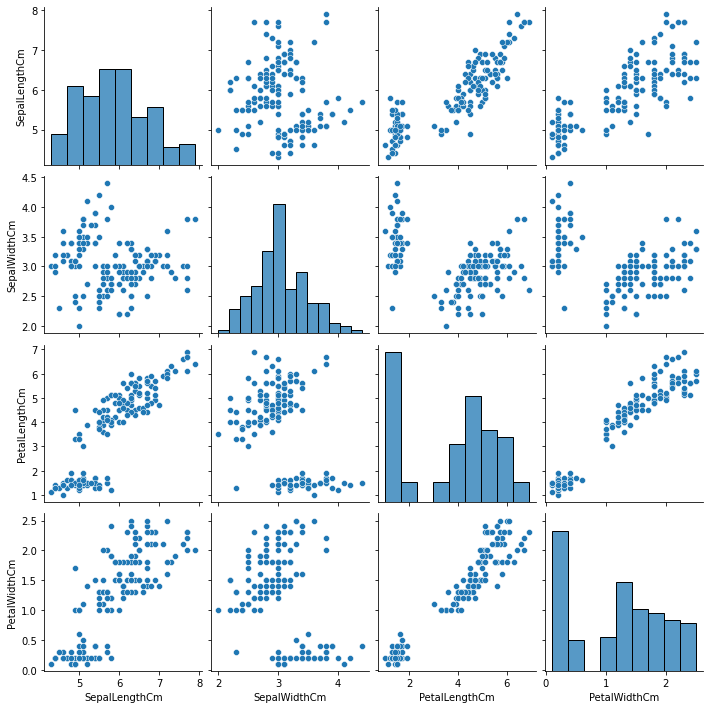

In [ ]:
sns.pairplot(data_unl)

# K Means Clustering

## Finding the optimal no.of clusters.


In [ ]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1,6):
  model = KMeans(n_clusters=k)
  model.fit(data_unl)
  inertia.append(model.inertia_)

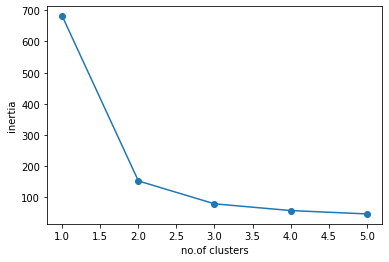

In [ ]:
plt.plot(range(1,6), inertia, '-o')
plt.xlabel('no.of clusters')
plt.ylabel('inertia')
plt.show()

Optimal no.of clusters is 3.

## Modelling

In [ ]:
model = KMeans(n_clusters=3)
model.fit(data_unl)
labels_pred = model.predict(data_unl)
print(labels_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [ ]:
model.inertia_

78.940841426146

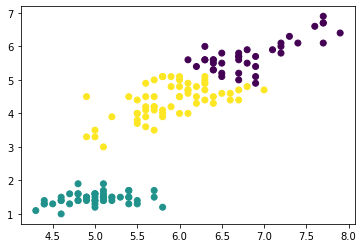

In [ ]:
import matplotlib.pyplot as plt
sl = data_unl['SepalLengthCm']
pl = data_unl['PetalLengthCm']
plt.scatter(sl, pl, c=labels_pred)

In [ ]:
sample = [[5.7,4.2,1.2,0.4]]
new_pred = model.predict(sample)
print(new_pred)

[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


## Evaluate the model.

In [ ]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
species = data['Species']
df = pd.DataFrame({'label':labels_pred, 'Species':species})
df.head()

,label,Species
0,1,Iris-setosa
1,1,Iris-setosa
2,1,Iris-setosa
3,1,Iris-setosa
4,1,Iris-setosa


In [ ]:
pd.crosstab(df['label'], df['Species'])

Species,Iris-setosa,Iris-versicolor,Iris-virginica
label,,,
0,0,2,36
1,50,0,0
2,0,48,14


## Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn.pipeline import make_pipeline 
pipe = make_pipeline(sc, model)
pipe.fit(data_unl)
labels_pred_sc = pipe.predict(data_unl)
print(labels_pred_sc)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2
 2 1 1 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


In [ ]:
species = data['Species']
df = pd.DataFrame({'label':labels_pred_sc, 'Species':species})
pd.crosstab(df['label'], df['Species'])

Species,Iris-setosa,Iris-versicolor,Iris-virginica
label,,,
0,50,0,0
1,0,11,36
2,0,39,14


## Normalization

In [ ]:
from sklearn.preprocessing import Normalizer
pipe1 = make_pipeline(Normalizer(), model)
pipe1.fit(data_unl)
labels_pred_norm = pipe1.predict(data_unl)
print(labels_pred_norm)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 2 0
 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
species = data['Species']
df = pd.DataFrame({'label':labels_pred_norm, 'Species':species})
pd.crosstab(df['label'], df['Species'])

Species,Iris-setosa,Iris-versicolor,Iris-virginica
label,,,
0,0,45,0
1,50,0,0
2,0,5,50


# Agglomerative Hierarchical Clustering

## Normalisation

In [ ]:
data_unl_norm = Normalizer().fit_transform(data_unl)

## Optimal no.of clusters.

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

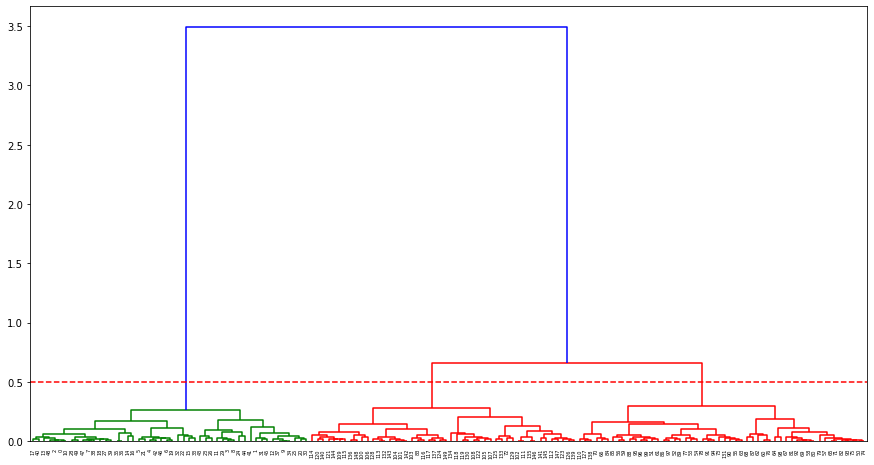

In [ ]:
linked = linkage(data_unl_norm, method='ward')
plt.figure(figsize=(15,8))
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.hlines(0.5, 0, 5000, colors='r', linestyles='dashed')
plt.show()

## Modelling

In [ ]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels_ac = ac.fit_predict(data_unl_norm)
labels_ac

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
df1 = pd.DataFrame({'Label': labels_ac, 'Species': data['Species']})
pd.crosstab(df1['Label'], df1['Species'])

Species,Iris-setosa,Iris-versicolor,Iris-virginica
Label,,,
0,0,48,4
1,50,0,0
2,0,2,46
